In [1]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import regularizers
from tensorflow.keras.datasets import cifar10

import os
import numpy as np
import matplotlib.pyplot as plt

# ignore information messgaes from tensorflow, but we will receieve error messages
os.environ['TFF_CPP_MIN_LOG_LEVEL'] = '2'

%matplotlib inline

In [2]:
## X_train -> train images
## Y_train -> train labels
## X_test  -> test images
## Y_test  -> test labels

(X_train, Y_train), (X_test, Y_test) = cifar10.load_data()
print(X_train.shape, Y_train.shape)
print(X_test.shape, Y_test.shape)

(50000, 32, 32, 3) (50000, 1)
(10000, 32, 32, 3) (10000, 1)


In [3]:
class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

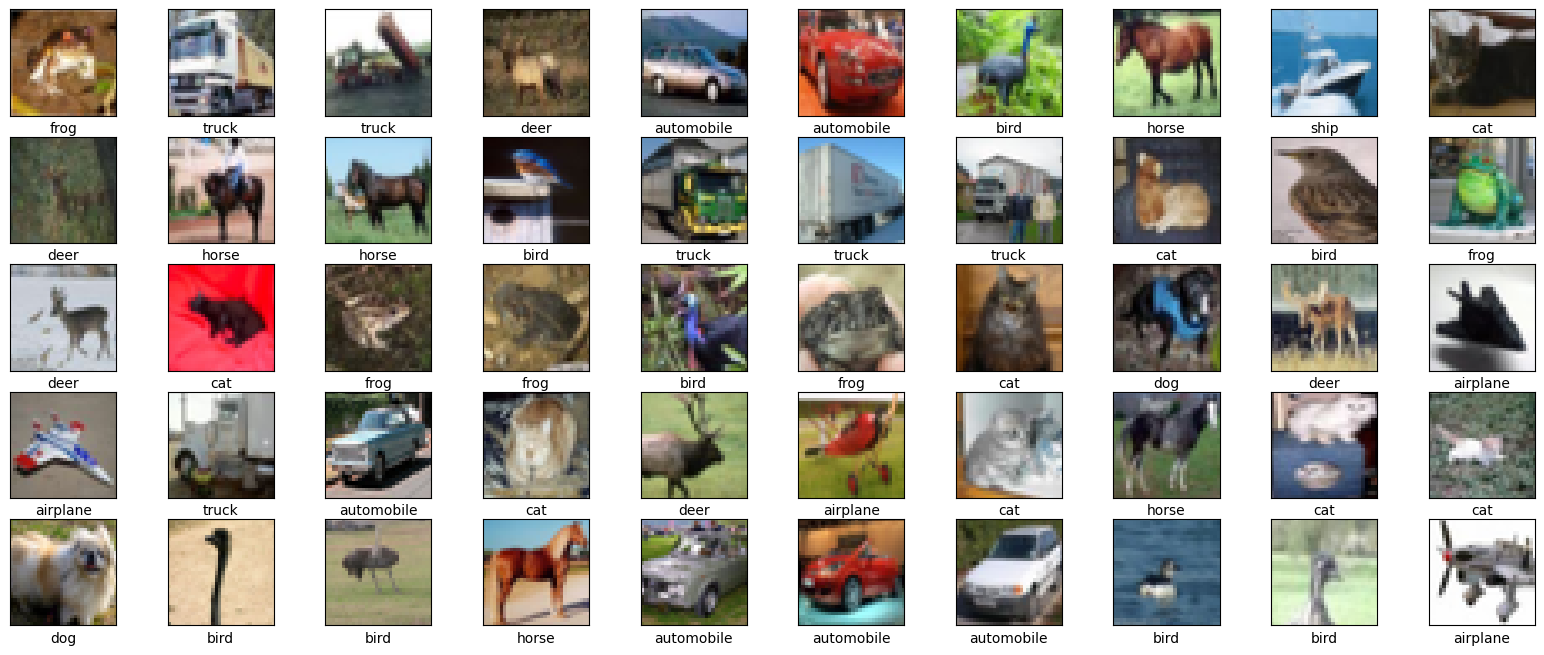

In [4]:
plt.figure(figsize=(20,8))
for i in range(50):
    plt.subplot(5, 10, i+1)
    plt.imshow(X_train[i])
    plt.xticks([])
    plt.yticks([])
    plt.xlabel(class_names[Y_train[i][0]])

plt.show()

In [5]:
X_train_processed, X_test_processed = X_train / 255.0, X_test / 255.0

In [6]:
model = keras.Sequential()

# Convolutional Layers
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid', input_shape=(32, 32, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(16, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
model.add(layers.BatchNormalization())
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Dropout(0.5))

# Fully Connected Layers
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 30, 30, 16)        448       
                                                                 
 batch_normalization (BatchN  (None, 30, 30, 16)       64        
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_1 (Batc  (None, 30, 30, 16)       64        
 hNormalization)                                                 
                                                                 
 conv2d_2 (Conv2D)           (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_2 (Batc  (None, 30, 30, 16)       6

In [7]:
model.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
model_l1 = keras.Sequential()

# Convolutional Layers
model_l1.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l1(0.01), input_shape=(32, 32, 3)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.5))

model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.5))

model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l1(0.01), padding='same'))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.MaxPooling2D((2, 2)))
model_l1.add(layers.Dropout(0.5))

# Fully Connected Layers
model_l1.add(layers.Flatten())
model_l1.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))
model_l1.add(layers.BatchNormalization())
model_l1.add(layers.Dropout(0.5))
model_l1.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l1(0.01)))

model_l1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_10 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_11 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_11 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_12 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_12 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_13 (Bat  (None, 30, 30, 16)      

In [9]:
model_l1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [10]:
model_l2 = keras.Sequential()

# Convolutional Layers
model_l2.add(layers.Conv2D(16, (3, 3), activation='relu', padding='valid',kernel_regularizer=regularizers.l2(0.01), input_shape=(32, 32, 3)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(16, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.5))

model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(32, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.5))

model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Conv2D(64, (3, 3), activation='relu',kernel_regularizer=regularizers.l2(0.01), padding='same'))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.MaxPooling2D((2, 2)))
model_l2.add(layers.Dropout(0.5))

# Fully Connected Layers
model_l2.add(layers.Flatten())
model_l2.add(layers.Dense(256, activation='relu', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))
model_l2.add(layers.BatchNormalization())
model_l2.add(layers.Dropout(0.5))
model_l2.add(layers.Dense(10, activation='softmax', kernel_regularizer=regularizers.l2(0.01), bias_regularizer=regularizers.l2(0.01)))

model_l2.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_20 (Conv2D)          (None, 30, 30, 16)        448       
                                                                 
 batch_normalization_22 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_21 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_23 (Bat  (None, 30, 30, 16)       64        
 chNormalization)                                                
                                                                 
 conv2d_22 (Conv2D)          (None, 30, 30, 16)        2320      
                                                                 
 batch_normalization_24 (Bat  (None, 30, 30, 16)      

In [11]:
model_l2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)

In [12]:
epochs = 20

In [13]:
model_processed = model
h = model.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 22s 12ms/step - loss: 2.2182 - accuracy: 0.2635 - val_loss: 1.6779 - val_accuracy: 0.3720
Epoch 2/20
625/625 [==============================] - 8s 12ms/step - loss: 1.6529 - accuracy: 0.3935 - val_loss: 1.6344 - val_accuracy: 0.4270
Epoch 3/20
625/625 [==============================] - 8s 12ms/step - loss: 1.4416 - accuracy: 0.4746 - val_loss: 1.4508 - val_accuracy: 0.4818
Epoch 4/20
625/625 [==============================] - 7s 11ms/step - loss: 1.2791 - accuracy: 0.5436 - val_loss: 1.5192 - val_accuracy: 0.5162
Epoch 5/20
625/625 [==============================] - 8s 12ms/step - loss: 1.1669 - accuracy: 0.5839 - val_loss: 1.2280 - val_accuracy: 0.5725
Epoch 6/20
625/625 [==============================] - 7s 11ms/step - loss: 1.0903 - accuracy: 0.6149 - val_loss: 1.0147 - val_accuracy: 0.6366
Epoch 7/20
625/625 [==============================] - 8s 12ms/step - loss: 1.0422 - accuracy: 0.6332 - val_loss: 1.0431 - val_accuracy: 0.637

In [14]:
h_processed = model_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 9s 13ms/step - loss: 0.6925 - accuracy: 0.7609 - val_loss: 3.0027 - val_accuracy: 0.1336
Epoch 2/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6743 - accuracy: 0.7688 - val_loss: 0.6040 - val_accuracy: 0.7933
Epoch 3/20
625/625 [==============================] - 8s 12ms/step - loss: 0.6604 - accuracy: 0.7727 - val_loss: 0.5820 - val_accuracy: 0.7981
Epoch 4/20
625/625 [==============================] - 8s 12ms/step - loss: 0.6492 - accuracy: 0.7753 - val_loss: 0.6543 - val_accuracy: 0.7808
Epoch 5/20
625/625 [==============================] - 7s 11ms/step - loss: 0.6457 - accuracy: 0.7781 - val_loss: 0.5907 - val_accuracy: 0.7999
Epoch 6/20
625/625 [==============================] - 8s 12ms/step - loss: 0.6284 - accuracy: 0.7839 - val_loss: 0.7083 - val_accuracy: 0.7662
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 0.6239 - accuracy: 0.7844 - val_loss: 0.6348 - val_accuracy: 0.7869

In [15]:
model_l1_processed = model_l1
h1 = model_l1.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 16s 13ms/step - loss: 26.9010 - accuracy: 0.2473 - val_loss: 5.6615 - val_accuracy: 0.1025
Epoch 2/20
625/625 [==============================] - 8s 13ms/step - loss: 4.0899 - accuracy: 0.2876 - val_loss: 3.9115 - val_accuracy: 0.1658
Epoch 3/20
625/625 [==============================] - 7s 12ms/step - loss: 3.4335 - accuracy: 0.2983 - val_loss: 3.4980 - val_accuracy: 0.2297
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 3.2840 - accuracy: 0.3065 - val_loss: 3.5209 - val_accuracy: 0.2364
Epoch 5/20
625/625 [==============================] - 8s 12ms/step - loss: 3.2074 - accuracy: 0.3100 - val_loss: 3.1190 - val_accuracy: 0.2689
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 3.0331 - accuracy: 0.3131 - val_loss: 3.2891 - val_accuracy: 0.2136
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 2.9580 - accuracy: 0.3142 - val_loss: 3.0118 - val_accuracy: 0.31

In [16]:
h1_processed = model_l1_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 10s 14ms/step - loss: 2.9647 - accuracy: 0.3789 - val_loss: 4.3269 - val_accuracy: 0.1091
Epoch 2/20
625/625 [==============================] - 8s 13ms/step - loss: 2.8936 - accuracy: 0.3879 - val_loss: 3.8197 - val_accuracy: 0.2580
Epoch 3/20
625/625 [==============================] - 8s 12ms/step - loss: 2.9159 - accuracy: 0.3934 - val_loss: 3.0816 - val_accuracy: 0.3169
Epoch 4/20
625/625 [==============================] - 8s 13ms/step - loss: 2.8958 - accuracy: 0.3977 - val_loss: 2.8671 - val_accuracy: 0.3974
Epoch 5/20
625/625 [==============================] - 8s 13ms/step - loss: 2.8754 - accuracy: 0.3941 - val_loss: 2.9835 - val_accuracy: 0.3676
Epoch 6/20
625/625 [==============================] - 8s 12ms/step - loss: 2.8802 - accuracy: 0.4001 - val_loss: 3.2361 - val_accuracy: 0.3213
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 2.8553 - accuracy: 0.3977 - val_loss: 3.0281 - val_accuracy: 0.377

In [17]:
model_l2_processed = model_l2
h2 = model_l2.fit(x=X_train, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 17s 14ms/step - loss: 6.5386 - accuracy: 0.2791 - val_loss: 4.0630 - val_accuracy: 0.3621
Epoch 2/20
625/625 [==============================] - 8s 12ms/step - loss: 3.0111 - accuracy: 0.4376 - val_loss: 2.3276 - val_accuracy: 0.4792
Epoch 3/20
625/625 [==============================] - 8s 13ms/step - loss: 2.0473 - accuracy: 0.5181 - val_loss: 2.4530 - val_accuracy: 0.3796
Epoch 4/20
625/625 [==============================] - 7s 12ms/step - loss: 1.7781 - accuracy: 0.5536 - val_loss: 1.6691 - val_accuracy: 0.5568
Epoch 5/20
625/625 [==============================] - 8s 12ms/step - loss: 1.6860 - accuracy: 0.5692 - val_loss: 1.6183 - val_accuracy: 0.5971
Epoch 6/20
625/625 [==============================] - 8s 13ms/step - loss: 1.6522 - accuracy: 0.5866 - val_loss: 1.9676 - val_accuracy: 0.4955
Epoch 7/20
625/625 [==============================] - 7s 12ms/step - loss: 1.6171 - accuracy: 0.5978 - val_loss: 1.7386 - val_accuracy: 0.555

In [18]:
h2_processed = model_l2_processed.fit(x=X_train_processed, y=Y_train, epochs=epochs, validation_split=0.2, batch_size=64)

Epoch 1/20
625/625 [==============================] - 10s 14ms/step - loss: 1.4839 - accuracy: 0.6558 - val_loss: 3.3969 - val_accuracy: 0.1115
Epoch 2/20
625/625 [==============================] - 8s 13ms/step - loss: 1.4725 - accuracy: 0.6603 - val_loss: 1.5299 - val_accuracy: 0.6441
Epoch 3/20
625/625 [==============================] - 7s 12ms/step - loss: 1.4601 - accuracy: 0.6626 - val_loss: 1.5828 - val_accuracy: 0.6271
Epoch 4/20
625/625 [==============================] - 8s 12ms/step - loss: 1.4618 - accuracy: 0.6598 - val_loss: 1.4161 - val_accuracy: 0.6698
Epoch 5/20
625/625 [==============================] - 8s 12ms/step - loss: 1.4512 - accuracy: 0.6637 - val_loss: 1.4414 - val_accuracy: 0.6659
Epoch 6/20
625/625 [==============================] - 7s 12ms/step - loss: 1.4445 - accuracy: 0.6709 - val_loss: 1.5228 - val_accuracy: 0.6534
Epoch 7/20
625/625 [==============================] - 8s 13ms/step - loss: 1.4381 - accuracy: 0.6695 - val_loss: 1.3524 - val_accuracy: 0.698

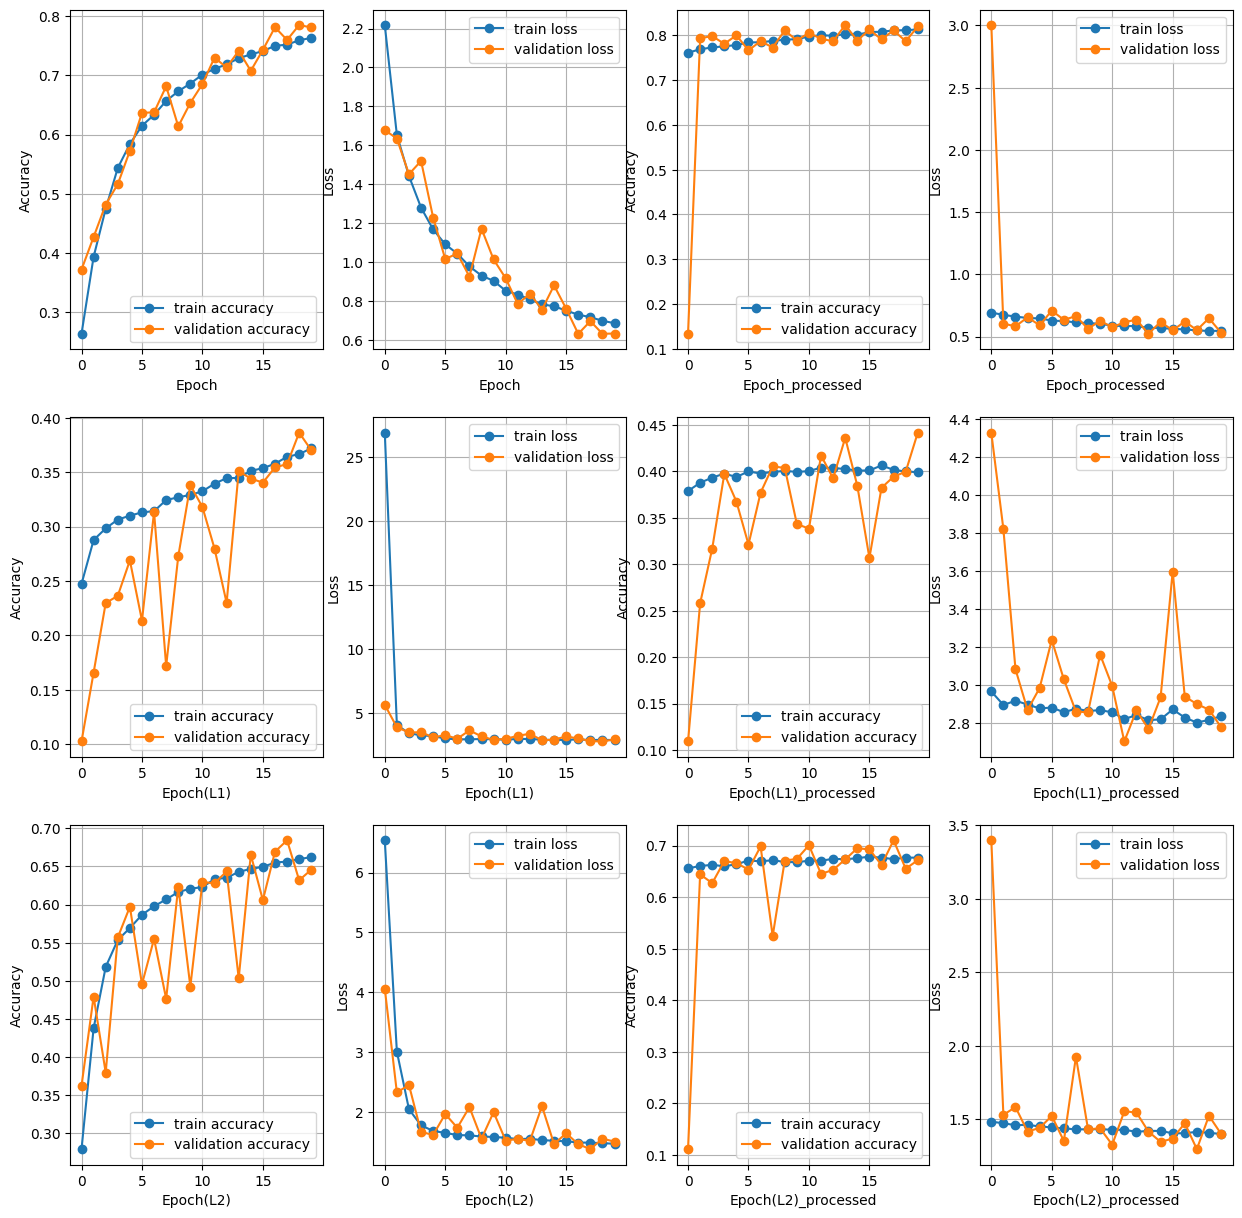

In [19]:
plt.figure(figsize=(15,15))

plt.subplot(3,4,1)
plt.plot(h.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,2)
plt.plot(h.history['loss'], 'o-', label='train loss')
plt.plot(h.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,3)
plt.plot(h_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,4)
plt.plot(h_processed.history['loss'], 'o-', label='train loss')
plt.plot(h_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,5)
plt.plot(h1.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,6)
plt.plot(h1.history['loss'], 'o-', label='train loss')
plt.plot(h1.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,7)
plt.plot(h1_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h1_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,8)
plt.plot(h1_processed.history['loss'], 'o-', label='train loss')
plt.plot(h1_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L1)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,9)
plt.plot(h2.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,10)
plt.plot(h2.history['loss'], 'o-', label='train loss')
plt.plot(h2.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.subplot(3,4,11)
plt.plot(h2_processed.history['accuracy'], 'o-', label='train accuracy')
plt.plot(h2_processed.history['val_accuracy'], 'o-', label = 'validation accuracy')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend(loc='lower right')

plt.subplot(3,4,12)
plt.plot(h2_processed.history['loss'], 'o-', label='train loss')
plt.plot(h2_processed.history['val_loss'], 'o-', label='validation loss')
plt.xlabel('Epoch(L2)_processed')
plt.ylabel('Loss')
plt.grid(True)
plt.legend(loc='upper right')

plt.show()

In [20]:
test_acc, test_loss = model.evaluate(X_test, Y_test)
test_acc_processed, test_loss_processed = model_processed.evaluate(X_test_processed, Y_test)
test_acc_l1, test_loss_l1 = model_l1.evaluate(X_test, Y_test)
test_acc_l1_processed, test_loss_l1_processed = model_l1_processed.evaluate(X_test_processed, Y_test)
test_acc_l2, test_loss_l2 = model_l2.evaluate(X_test, Y_test)
test_acc_l2_processed, test_loss_l2_processed = model_l2_processed.evaluate(X_test_processed, Y_test)

313/313 [==============================] - 1s 4ms/step - loss: 1.4299 - accuracy: 0.6669


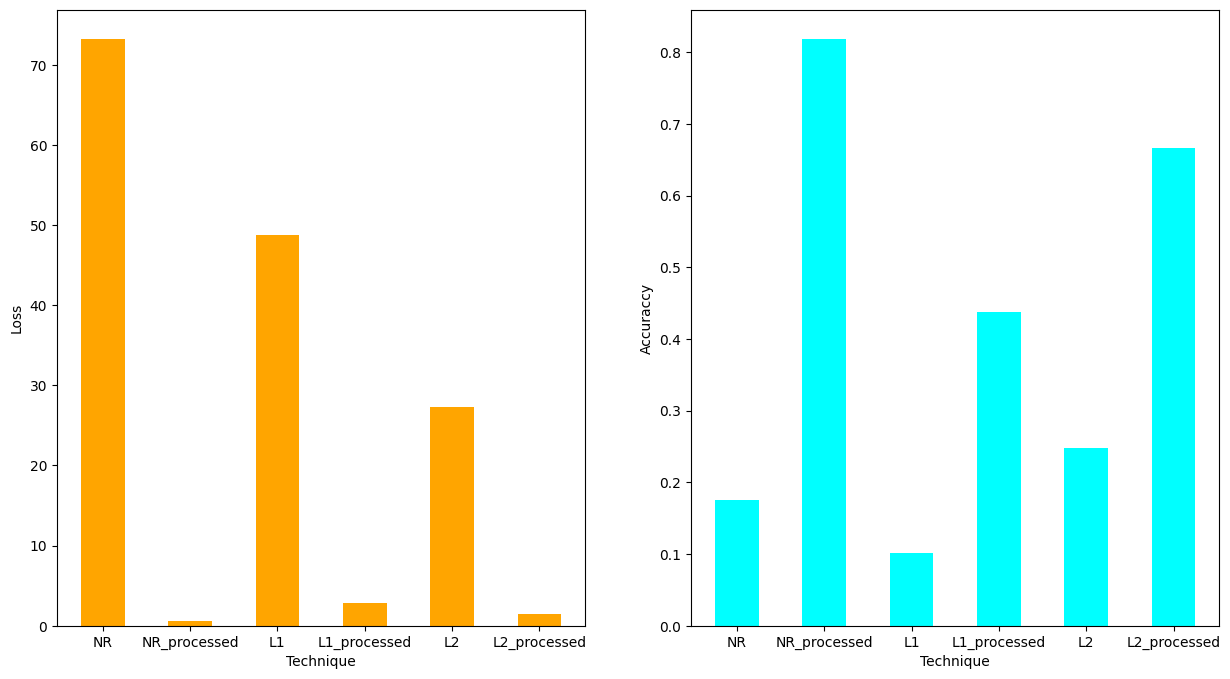

In [21]:
plt.figure(figsize=(15,8))

x = np.arange(6)
y1 = [test_loss, test_loss_processed, test_loss_l1, test_loss_l1_processed, test_loss_l2, test_loss_l2_processed]
y2 = [test_acc, test_acc_processed, test_acc_l1, test_acc_l1_processed, test_acc_l2, test_acc_l2_processed]
width = 0.5

# plot data in grouped manner of bar type
plt.subplot(1,2,1)
plt.bar(x, y2, width, color='orange')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Loss")

# plot data in grouped manner of bar type
plt.subplot(1,2,2)
plt.bar(x, y1, width, color='cyan')
plt.xticks(x, ['NR', 'NR_processed', 'L1', 'L1_processed', 'L2', 'L2_processed'])
plt.xlabel("Technique")
plt.ylabel("Accuraccy")
plt.show()